In [1]:
from transformers import GPT2LMHeadModel

/home/htkumar/local/miniconda3/envs/gpt-2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from datasets import load_dataset

/home/htkumar/local/miniconda3/envs/gpt-2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
torch.cuda.is_available()

True

In [4]:
torch.cuda.is_bf16_supported()

True

In [ ]:
torch.tril(torch.ones(8, 8)).view(1, 1, 8, 8)

In [ ]:
x = torch.arange(12).view(2, 2, 3)
x.shape

In [ ]:
q, k, v = x.chunk(3, dim=2)
q.shape, k.shape, v.shape

In [ ]:
q, k, v = x.split(1, dim=2)
q.shape, k.shape, v.shape

In [ ]:
module_dict = nn.ModuleDict(
    dict(
        module_1=nn.Linear(10, 10),
        module_2=nn.Linear(10, 10),
    )
)

In [ ]:
module_dict.keys()

In [ ]:
q.shape

In [ ]:
q.shape[::-1]

In [ ]:
a = torch.arange(6).view(2, 3)
a.shape

In [ ]:
a.t().shape

In [ ]:
import tiktoken

In [ ]:
a = torch.arange(12).view(3, 4).double()
a.shape, a.dtype

In [ ]:
a = F.softmax(a, dim=1)
a

In [ ]:
topk_probs, topk_indices = torch.topk(a, 2, dim=1)

In [ ]:
topk_probs

In [ ]:
topk_indices

In [ ]:
b = torch.multinomial(topk_probs, 1)
b

In [ ]:
b.shape

In [ ]:
xcol = torch.gather(topk_indices, -1, b)
xcol

In [ ]:
t = torch.tensor([[1, 2], [3, 4]])
torch.gather(t, 1, torch.tensor([[0, 0], [1, 0]]))

In [ ]:
torch.gather(t, 0, torch.tensor([[0, 0], [1, 0]]))

In [ ]:
a = torch.tensor(1)
a.shape

In [ ]:
a.item()

In [ ]:
a = torch.tensor([1, 2, 3])
len(a)

In [ ]:
import time

t0 = time.time()
t0

In [ ]:
t1 = time.time()

In [ ]:
(t1 - t0)

In [ ]:
time.time??

In [5]:
import math

In [6]:
max_lr = 6e-4
min_lr = max_lr * 0.1
warmup_steps = 10
max_steps = 50


def get_lr(it):
    # linear warmup
    if it < warmup_steps:
        return max_lr * (it + 1) / warmup_steps
    elif it > max_steps:
        return min_lr
    # cosine decay
    decay_ratio = (it - warmup_steps) / (max_steps - warmup_steps)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio))
    return min_lr + coeff * (max_lr - min_lr)

In [12]:
iters = list(range(100))

In [14]:
lrs = [get_lr(it) for it in iters]

In [17]:
import matplotlib.pyplot as plt


Bad key keymap.all_axes in file /mnt/xarfuse/uid-285367/b89978fe-seed-nspid4026531836_cgpid14017160-ns-4026531840/bento/server/matplotlibrc-3.1.3, line 76 ('keymap.all_axes : a                 # enable all axes')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.4/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


In [19]:
plt.style.use("_mpl-gallery")

findfont: Font family 'Noto Sans TC' not found.


findfont: Font family 'Noto Sans SC' not found.


findfont: Font family 'Noto Sans TC' not found.


findfont: Font family 'Noto Sans SC' not found.


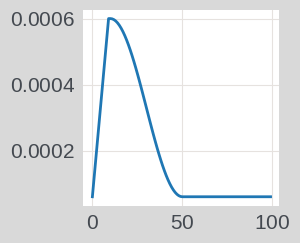

In [21]:
plt.plot(iters, lrs, linewidth=2.0)

In [1]:
import os

os.getcwd()

'/data/users/htkumar'

In [2]:
import sys

sys.path.append("/home/htkumar/llms/gpt2_karpathy")

In [3]:
from train_gpt2 import GPT, GPTConfig

model = GPT(GPTConfig(vocab_size=50304))

using device: cuda
loaded 338025 in dataloader, num_batches in 1 epoch is 20
loss at iter 0: 10.947336196899414, time_taken: 26720.49, tokens_per_sec: 613.16, norm: 28.5689
loss at iter 1: 9.502246856689453, time_taken: 107.53, tokens_per_sec: 152371.35, norm: 10.6583
loss at iter 2: 9.251029968261719, time_taken: 107.51, tokens_per_sec: 152388.24, norm: 7.3670
loss at iter 3: 9.761412620544434, time_taken: 108.47, tokens_per_sec: 151045.43, norm: 6.6522
loss at iter 4: 9.103813171386719, time_taken: 106.80, tokens_per_sec: 153407.44, norm: 4.2447
loss at iter 5: 8.79364013671875, time_taken: 107.71, tokens_per_sec: 152106.93, norm: 3.2618
loss at iter 6: 8.584518432617188, time_taken: 107.02, tokens_per_sec: 153088.25, norm: 2.3656
loss at iter 7: 8.26370620727539, time_taken: 106.81, tokens_per_sec: 153391.35, norm: 2.0581
loss at iter 8: 7.886693954467773, time_taken: 106.93, tokens_per_sec: 153216.58, norm: 2.2193
loss at iter 9: 7.517749786376953, time_taken: 107.59, tokens_per_se

In [6]:
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, betas=(0.9, 0.95), eps=1e-9)

In [13]:
optimizer.param_groups[0]["lr"]

0.0003